<a href="https://colab.research.google.com/github/Sujan-Sawant/Hypothesis_Testing-Yulu_Business_Case_Study/blob/main/YULU_Business_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = "Orange">**Business Case: Yulu - Hypothesis Testing**
- Yulu is India's leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

- Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!



# Business Problem


- Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

- The company wants to know:

 1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
 2. How well those variables describe the electric cycle demands

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

- **datetime:** datetime
- **season:** season

 *   season 1: spring,
 *   season 2: summer,
 *   season 3: fall,
 *   season 4: winter

- **holiday:** whether day is a holiday or not.
- **workingday:** if day is neither weekend nor holiday is 1, otherwise is 0.
- **weather:**
 *   1: Clear, Few clouds, partly cloudy, partly cloudy
 *   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 *   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 *   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- **temp:** temperature in Celsius
- **atemp:** feeling temperature in Celsius
- **humidity:** humidity
- **windspeed:** wind speed
- **casual:** count of casual users
- **registered:** count of registered users
- **count:** count of total rental bikes including both casual and registered





In [ ]:
# Importing the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Downloding the data
!gdown 1GMXMXqiFJH22tfoZDc-6XBeeFueEkyBG

Downloading...
From: https://drive.google.com/uc?id=1GMXMXqiFJH22tfoZDc-6XBeeFueEkyBG
To: /content/bike_sharing.txt
100% 648k/648k [00:00<00:00, 25.7MB/s]


In [ ]:
# Reading or Loading a CSV file into a pandas DataFrame.
df = pd.read_csv("/content/bike_sharing.txt")

In [ ]:
# Viewing the first few rows of a DataFrame.
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Viewing the last few rows of a DataFrame.
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


## Exploratory Data Analysis and Data Cleaning (EDA)

In [ ]:
# Retrieving the dimensions of a DataFrame (Rows, Columns).

df.shape

(10886, 12)

In [ ]:
# Retrieving the column labels (names) of a DataFrame .

df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
# Display the number of missing values (NaN) in each column of the DataFrame

df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
# Retrieving statistics of the numerical columns in a DataFrame.

df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Retrieving summary of a DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# Display the data type of each column in a DataFrame

df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


## Lets change the datatype of some columns to their correted dtype.

In [ ]:
# Convert 'datetime' to datetime type

df["datetime"] = pd.to_datetime(df["datetime"])


# 'season', 'weather', 'holiday', 'workingday' can be treated as categorical
df['season'] = df['season'].astype('category')
df['weather'] = df['weather'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')

In [ ]:
df.dtypes

,0
datetime,datetime64[ns]
season,category
holiday,category
workingday,category
weather,category
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


## Check for outliers

1. Temperature (temperature in Celsius)

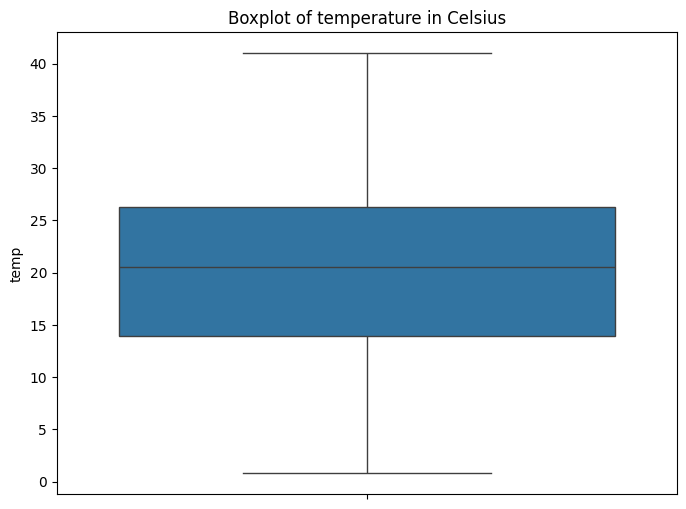

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df["temp"])
plt.title("Boxplot of temperature in Celsius")
plt.show()

No outlier present in the occupation.

2. atemp (feeling temperature in Celsius)

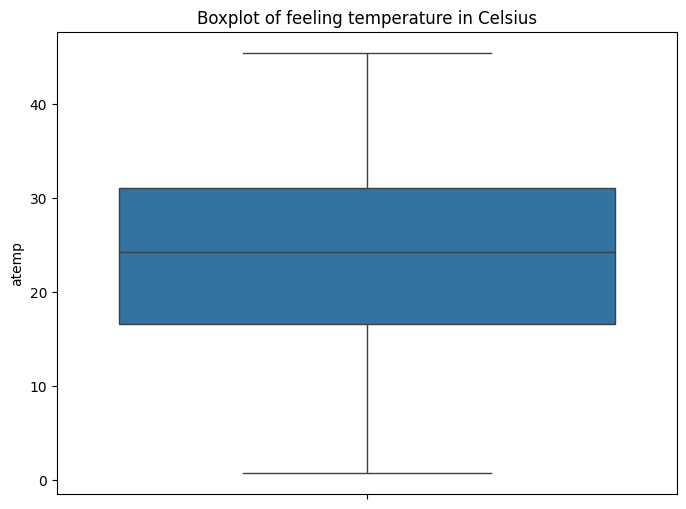

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df["atemp"])
plt.title("Boxplot of feeling temperature in Celsius")
plt.show()

No outlier present in the occupation.

3. humidity

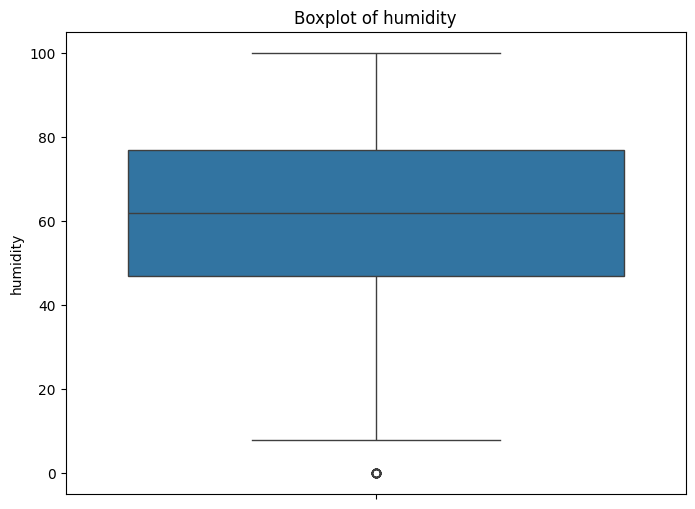

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df["humidity"])
plt.title("Boxplot of humidity")
plt.show()

## Detecting Outlier values using **Interquartile Range (IQR)** Method

In [ ]:
Q1 = df["humidity"].quantile(0.25)
Q3 = df["humidity"].quantile(0.75)
IQR = Q3-Q1

# Set k = 1.5
k = 1.5

left_most = Q1 - k * IQR
right_most = Q3 + k * IQR


print("Left boundary:", left_most)
print("Right boundary:", right_most)


outliers = df[(df["humidity"] < left_most) | (df["humidity"] > right_most)]["humidity"]

print("Outlier humidity:", set(outliers.tolist()))


Left boundary: 2.0
Right boundary: 122.0
Outlier humidity: {0}


4. windspeed: wind speed

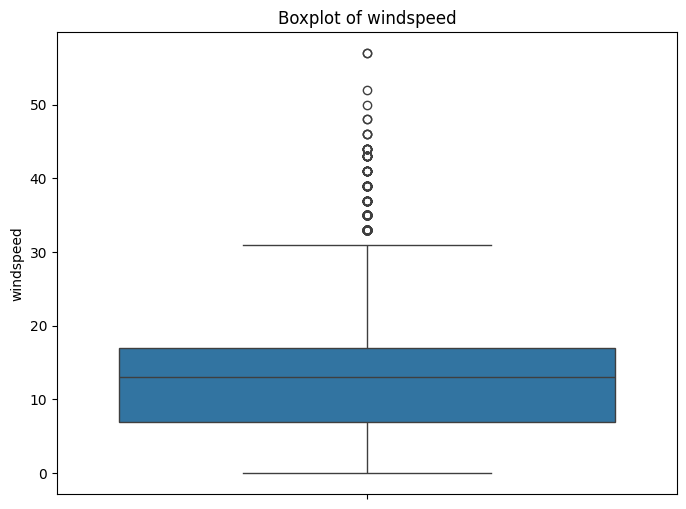

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df["windspeed"])
plt.title("Boxplot of windspeed")
plt.show()

## Detecting Outlier values using **Interquartile Range (IQR)** Method

In [ ]:
Q1 = df["windspeed"].quantile(0.25)
Q3 = df["windspeed"].quantile(0.75)
IQR = Q3 - Q1

# Set k = 1.5
k = 1.5
left_most = Q1 - k * IQR
right_most = Q3 + k * IQR

print("Left boundary:", round(left_most,2))
print("Right boundary:", round(right_most,2))


outliers = df[(df["windspeed"] < left_most) | (df["windspeed"] > right_most)]["windspeed"]

print("Outlier windspeed:", set(outliers.tolist()))

Left boundary: -7.99
Right boundary: 31.99
Outlier windspeed: {32.9975, 35.0008, 36.9974, 39.0007, 40.9973, 43.9989, 43.0006, 46.0022, 47.9988, 50.0021, 51.9987, 56.9969}


5. casual: count of casual users

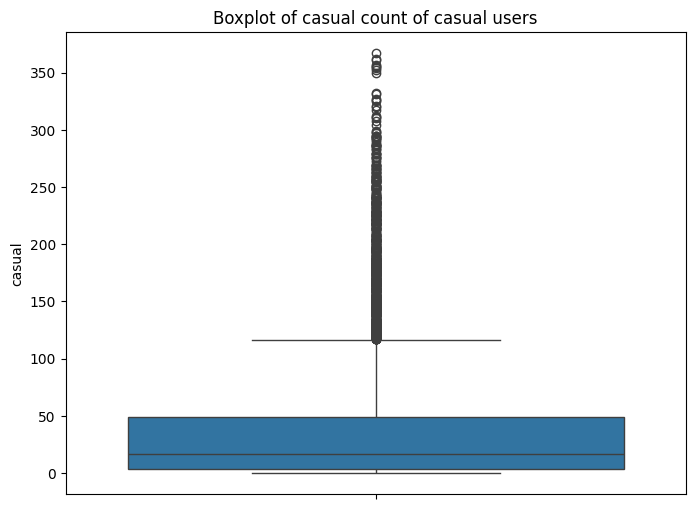

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df["casual"])
plt.title("Boxplot of casual count of casual users")
plt.show()

## Detecting Outlier values using Interquartile Range (IQR) Method

In [ ]:
Q1 = df["casual"].quantile(0.25)
Q3 = df["casual"].quantile(0.75)
IQR = Q3 - Q1

# Set k = 1.5
k = 1.5
left_most = Q1 - k * IQR
right_most = Q3 + k * IQR

print("Left boundary:", round(left_most,2))
print("Right boundary:", round(right_most,2))


outliers = df[(df["casual"] < left_most) | (df["casual"] > right_most)]["casual"]

print("Outlier casual:", set(outliers.tolist()))
print("No of Outliers:", len(set(outliers.tolist())))

Left boundary: -63.5
Right boundary: 116.5
Outlier casual: {117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 253, 254, 255, 256, 257, 258, 259, 260, 262, 263, 264, 265, 266, 267, 268, 269, 272, 274, 275, 276, 279, 280, 282, 283, 284, 286, 287, 288, 289, 291, 292, 293, 294, 295, 297, 298, 299, 304, 308, 310, 311, 312, 317, 320, 321, 325, 326, 327, 331, 332, 350, 352, 354, 355, 356, 

6. registered: count of registered users

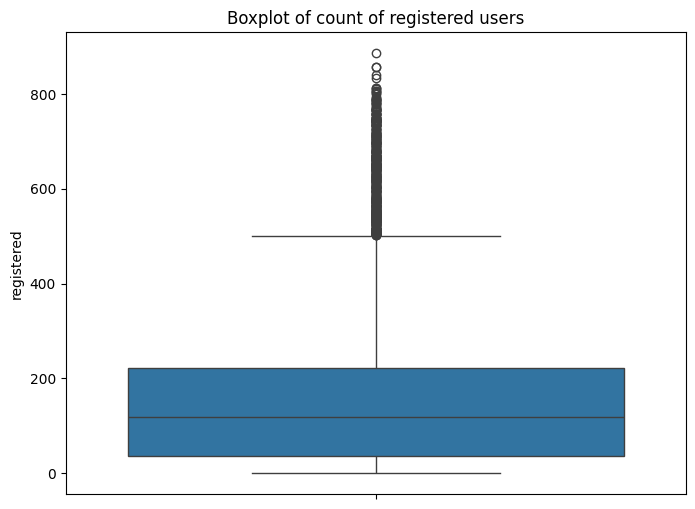

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df["registered"])
plt.title("Boxplot of count of registered users")
plt.show()

## Detecting Outlier values using Interquartile Range (IQR) Method

In [ ]:
Q1 = df["registered"].quantile(0.25)
Q3 = df["registered"].quantile(0.75)
IQR = Q3 - Q1

# Set k = 1.5
k = 1.5
left_most = Q1 - k * IQR
right_most = Q3 + k * IQR

print("Left boundary:", round(left_most,2))
print("Right boundary:", round(right_most,2))


outliers = df[(df["registered"] < left_most) | (df["registered"] > right_most)]["registered"]

print("Outlier registered:", set(outliers.tolist()))
print("No of Outliers:", len(set(outliers.tolist())))

Left boundary: -243.0
Right boundary: 501.0
Outlier registered: {512, 513, 514, 515, 516, 517, 518, 521, 522, 523, 525, 527, 529, 530, 531, 532, 533, 534, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 570, 571, 572, 573, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 586, 589, 591, 593, 594, 595, 596, 597, 598, 601, 602, 603, 604, 605, 608, 609, 610, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 628, 629, 631, 633, 634, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 655, 656, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 672, 673, 675, 677, 678, 679, 680, 681, 682, 684, 688, 689, 690, 692, 693, 694, 696, 697, 698, 699, 700, 702, 703, 704, 706, 708, 709, 711, 712, 713, 715, 716, 718, 719, 720, 723, 725, 726, 727, 733, 734, 735, 737, 739, 740, 741, 742, 743, 744, 745, 746, 749, 750, 751, 

7. count: count of total rental bikes including both casual and registered

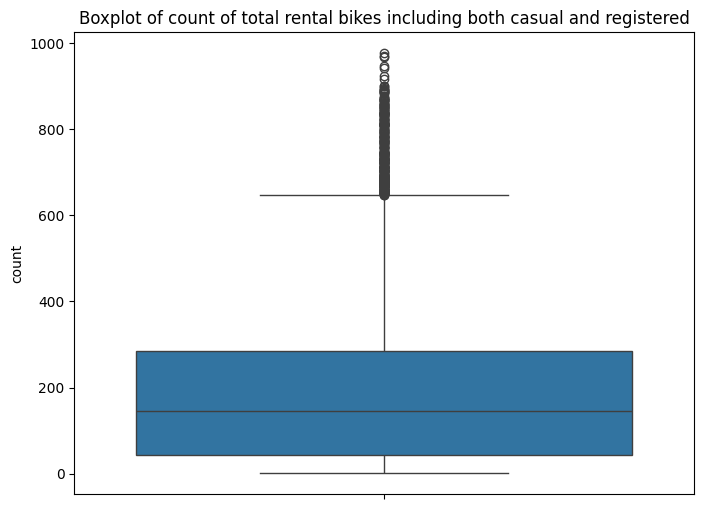

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df["count"])
plt.title("Boxplot of count of total rental bikes including both casual and registered")
plt.show()

## Detecting Outlier values using Interquartile Range (IQR) Method

In [ ]:
Q1 = df["count"].quantile(0.25)
Q3 = df["count"].quantile(0.75)
IQR = Q3 - Q1

# Set k = 1.5
k = 1.5
left_most = Q1 - k * IQR
right_most = Q3 + k * IQR

print("Left boundary:", round(left_most,2))
print("Right boundary:", round(right_most,2))


outliers = df[(df["count"] < left_most) | (df["count"] > right_most)]["count"]

print("Outlier count:", set(outliers.tolist()))
print("No of Outliers:", len(set(outliers.tolist())))

Left boundary: -321.0
Right boundary: 647.0
Outlier count: {648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 696, 698, 700, 701, 702, 704, 705, 706, 708, 710, 711, 712, 713, 715, 717, 719, 721, 722, 723, 724, 725, 729, 730, 731, 732, 733, 734, 737, 738, 739, 741, 743, 744, 745, 746, 747, 748, 749, 750, 755, 757, 758, 759, 761, 766, 767, 769, 770, 771, 772, 774, 775, 776, 777, 779, 781, 782, 783, 784, 785, 788, 790, 791, 792, 793, 794, 795, 797, 798, 800, 801, 806, 808, 809, 810, 811, 812, 813, 814, 817, 818, 819, 822, 823, 825, 827, 830, 831, 832, 834, 835, 837, 838, 839, 842, 843, 844, 846, 848, 849, 850, 851, 852, 854, 856, 857, 858, 862, 863, 865, 867, 868, 869, 871, 872, 873, 877, 884, 886, 887, 888, 890, 891, 892, 894, 897, 900, 901, 917, 925, 943, 948, 968, 970, 977}
No of Outliers: 180


In [ ]:
print(len(outliers.tolist()))

300


## Convert Numeric to Descriptive Labels
- season:  

 -    1 = spring,
 -    2 = summer,
 -    3 = fall,
 -    4 = winter


 - weather:  

  -    1 = Clear,
  -    2 = Mist ,
  -    3 = Light Snow,
  -    4 = Heavy Rain



Exact representation for weather is

- 1: Clear, Few clouds, partly cloudy, partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



            

In [ ]:
# Convert numeric vals to descriptive labels
season_map = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
df["season"] = df["season"].map(season_map)


In [ ]:
df["season"].value_counts()

,count
season,
winter,2734
summer,2733
fall,2733
spring,2686


In [ ]:
# Convert numeric vals to descriptive labels
weather_map = {1:"Clear",2:"Mist",3:"Light_Snow",4:"Heavy_Rain "}
df["weather"] = df["weather"].map(weather_map)

In [ ]:
df["weather"].value_counts()

,count
weather,
Clear,7192
Mist,2834
Light_Snow,859
Heavy_Rain,1


## Univariate Analysis.

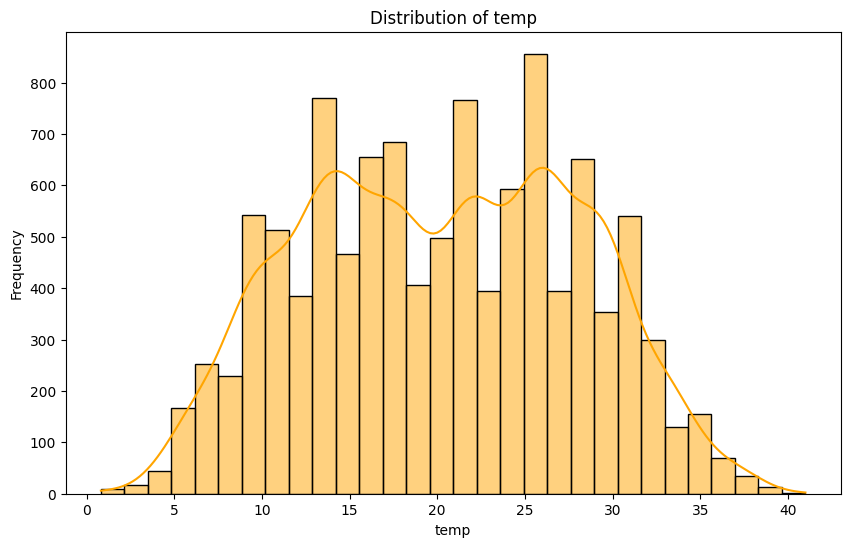

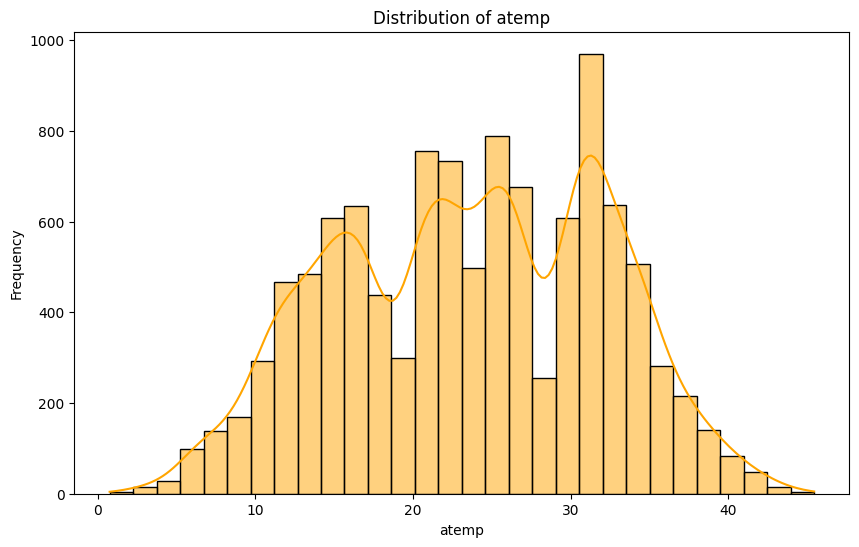

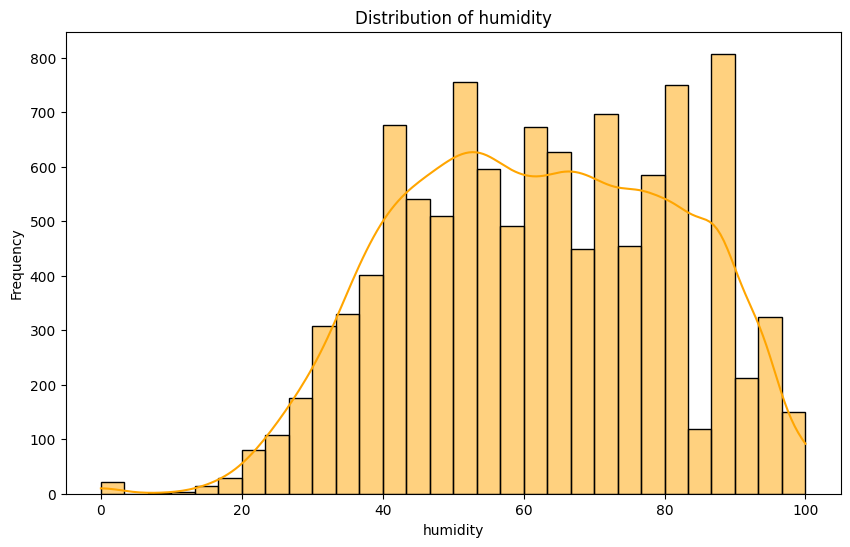

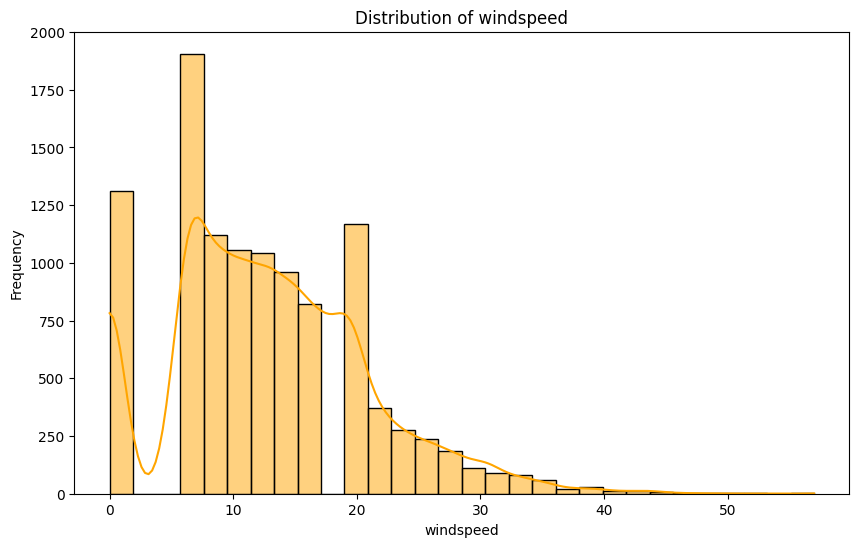

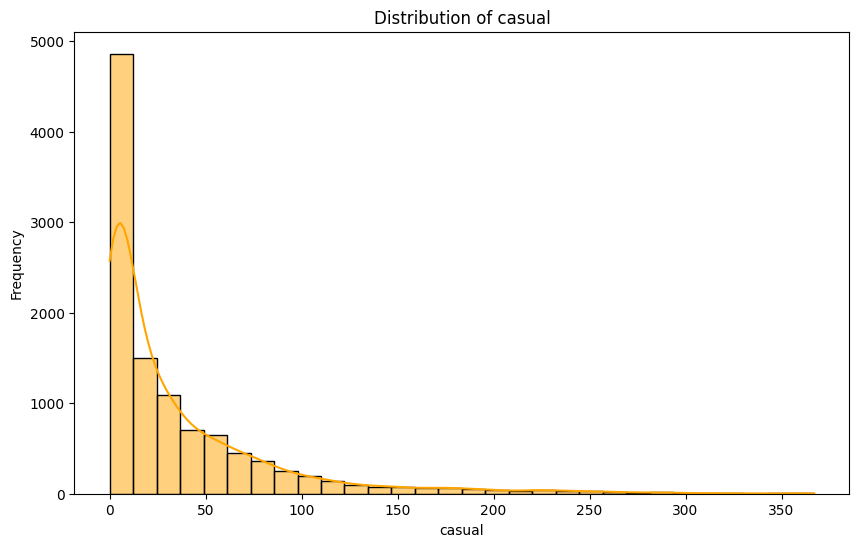

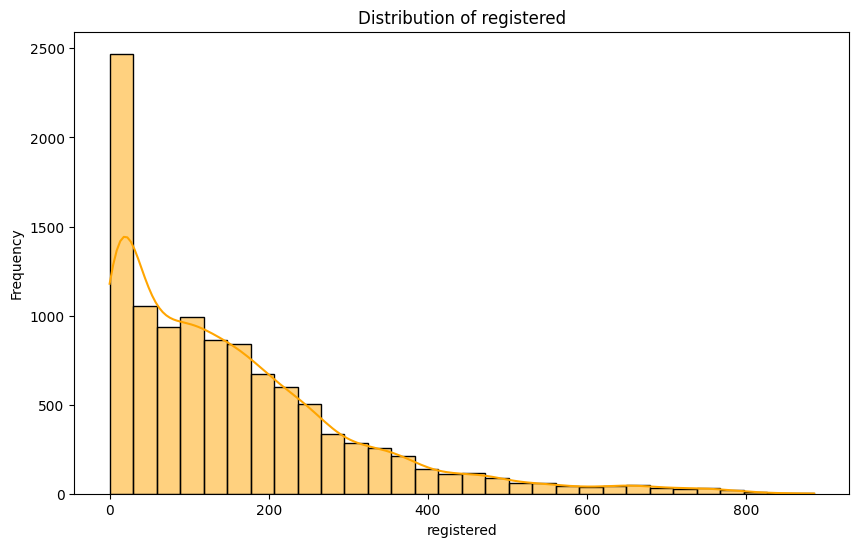

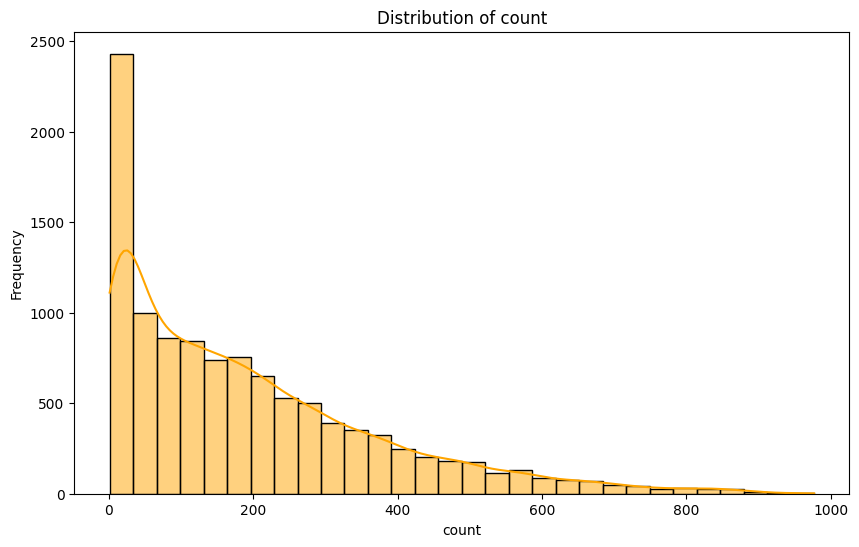

In [ ]:
# continuous variables
continuous_vars = ["temp","atemp","humidity","windspeed","casual","registered","count"]


# Plot distribution for each continuous variable in a separate figure
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], bins = 30,kde=True,color = 'orange')
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()


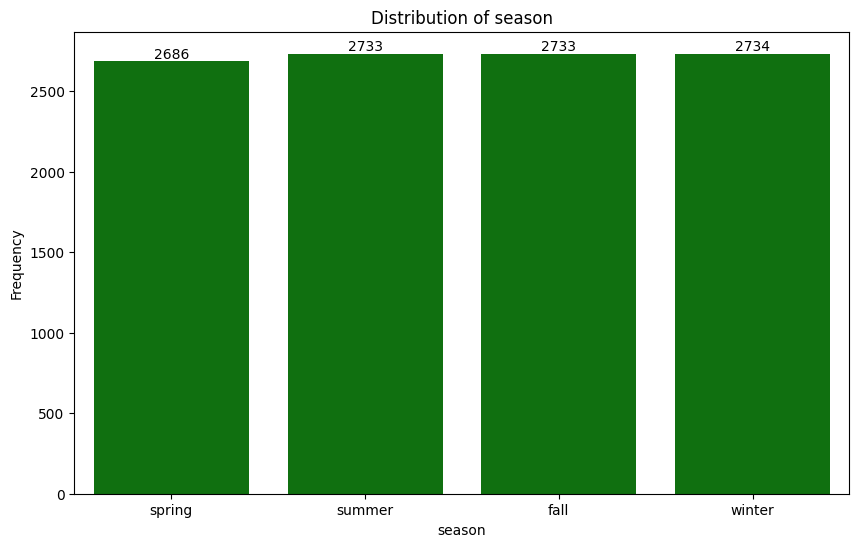

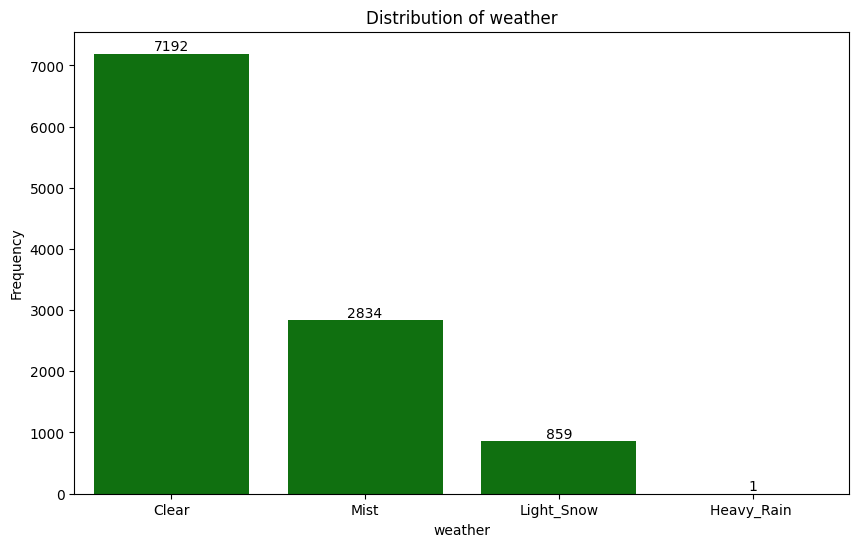

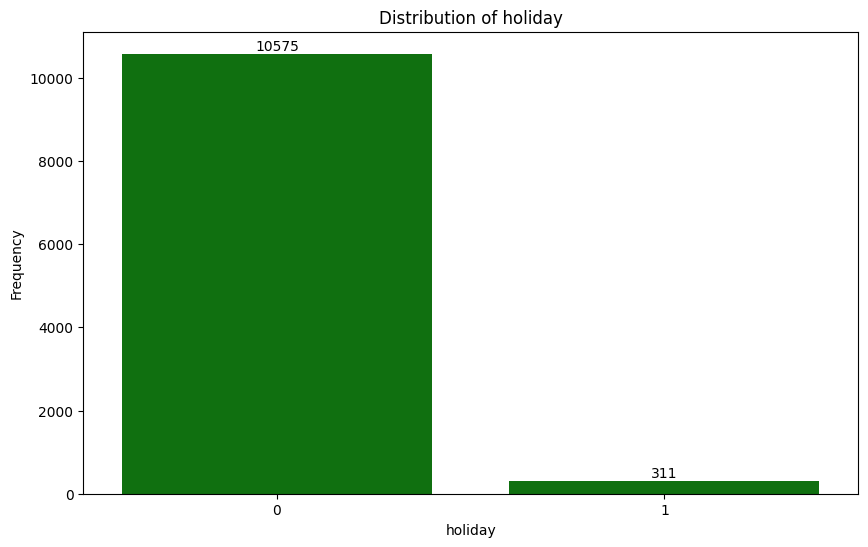

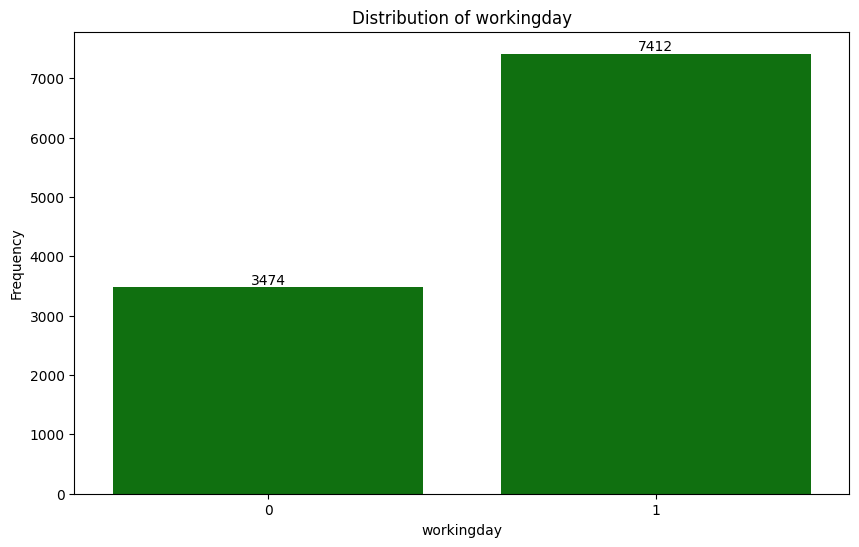

In [ ]:
# Categorical Variables:
categorical_vars = ['season', 'weather', 'holiday', 'workingday']

# Plot distribution for each Categorical variable in a separate figure
for var in categorical_vars:
  plt.figure(figsize = (10,6))
  ax = sns.countplot(x = df[var],color = "green")
  for label in ax.containers:
    ax.bar_label(label)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()


## Bivariate Analysis

<ipython-input-33-5648d9676cf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="workingday", y="count", data=df,palette="Dark2")


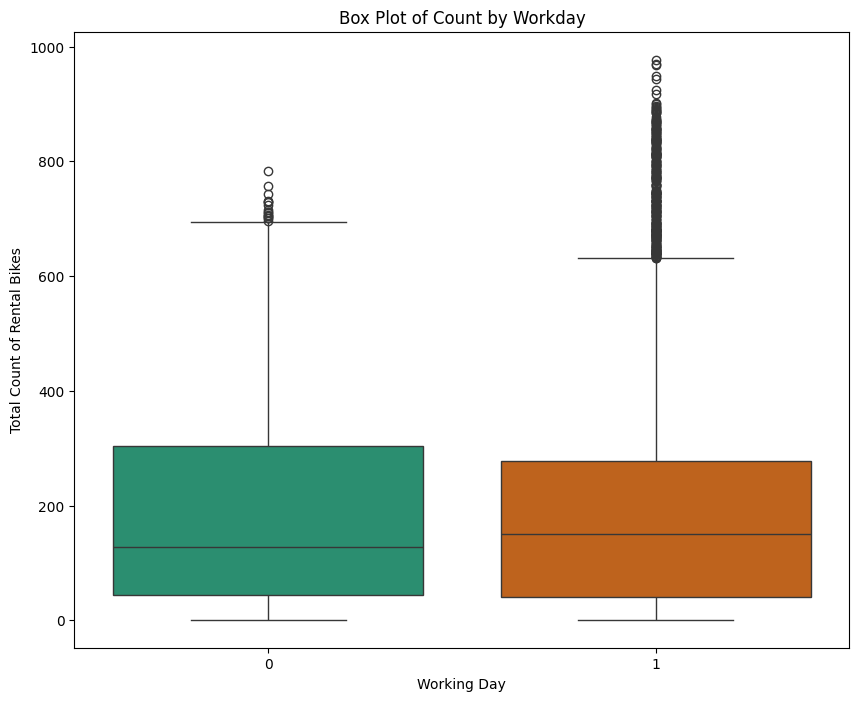

In [ ]:
# Workday and Count
plt.figure(figsize=(10, 8))
sns.boxplot(x="workingday", y="count", data=df,palette="Dark2")
plt.title("Box Plot of Count by Workday")
plt.xlabel("Working Day")
plt.ylabel("Total Count of Rental Bikes")
plt.show()


<ipython-input-34-7786ad1839da>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y="count", data=df,palette="Dark2")


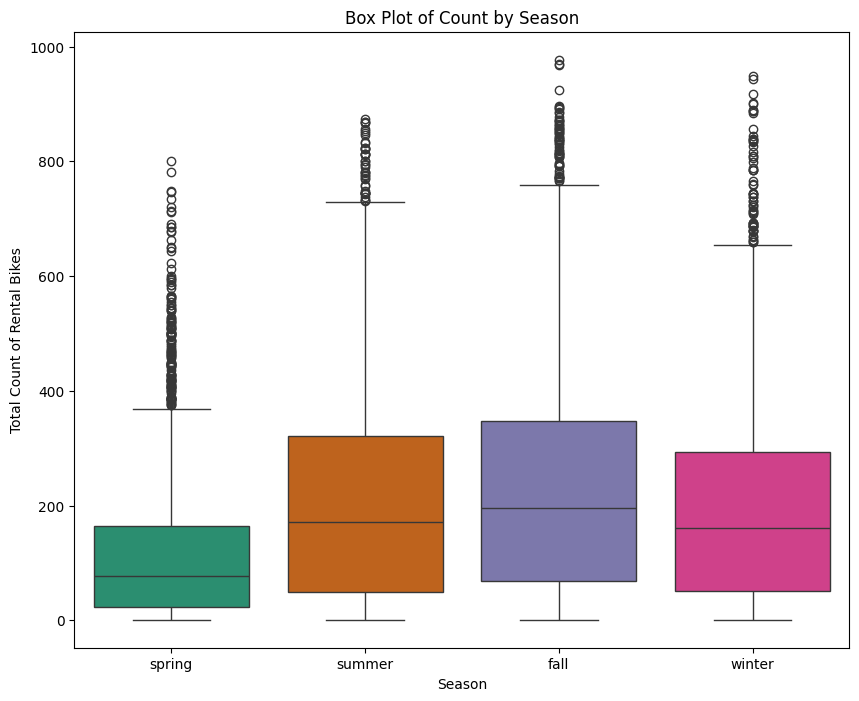

In [ ]:
# Season and Count:
plt.figure(figsize = (10,8))
sns.boxplot(x="season", y="count", data=df,palette="Dark2")
plt.title("Box Plot of Count by Season")
plt.xlabel("Season")
plt.ylabel("Total Count of Rental Bikes")
plt.show()



<ipython-input-35-80f0845d0dbe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weather", y="count", data=df,palette="Dark2")


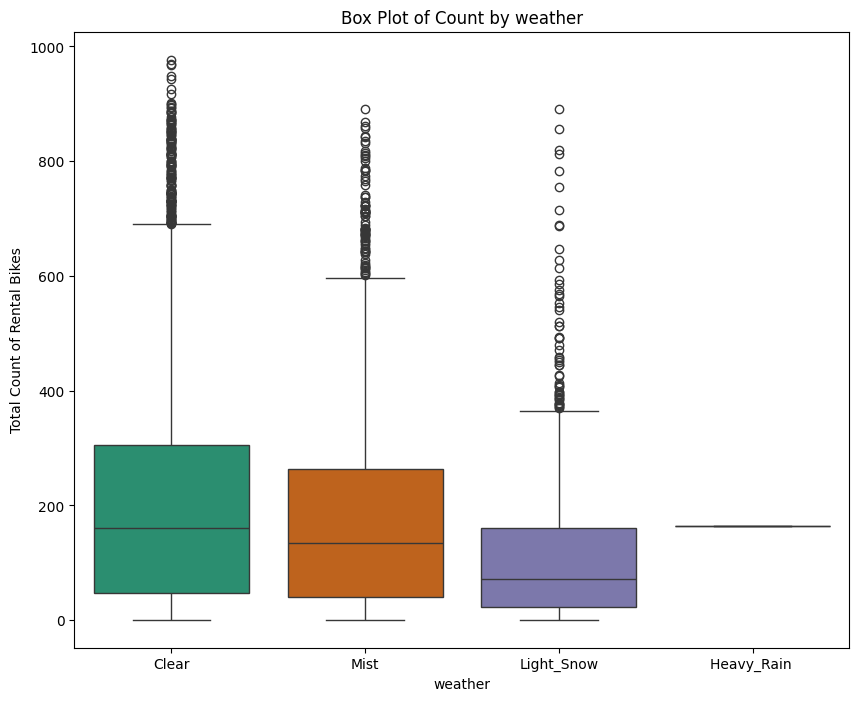

In [ ]:
# Weather and Count:
plt.figure(figsize = (10,8))
sns.boxplot(x="weather", y="count", data=df,palette="Dark2")
plt.title("Box Plot of Count by weather")
plt.xlabel("weather")
plt.ylabel("Total Count of Rental Bikes")
plt.show()

- For the above three graphs— **Workday vs. Count**, **Season vs. Count**, and **Weather vs. Count**— there are **numerous outliers**.
- Performing hypothesis tests without addressing these outliers can significantly affect the results.
- Therefore, we will treat outliers before conducting hypothesis tests for these three analyses.

In [ ]:
from scipy.stats import ttest_ind

# Assuming df is your DataFrame
working_day_counts = df[df['workingday'] == 1]['count']
non_working_day_counts = df[df['workingday'] == 0]['count']

t_stat, p_value = ttest_ind(working_day_counts, non_working_day_counts)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 1.2096277376026694, P-value: 0.22644804226361348


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA
model = ols('count ~ C(season)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                 sum_sq       df           F         PR(>F)
C(season)  2.190083e+07      3.0  236.946711  6.164843e-149
Residual   3.352721e+08  10882.0         NaN            NaN


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA
model = ols('count ~ C(weather)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                  sum_sq       df          F        PR(>F)
C(weather)  6.338070e+06      3.0  65.530241  5.482069e-42
Residual    3.508348e+08  10882.0        NaN           NaN


# Lets Perform Hypothesis Testing

- We have outliers present in columns such as **windspeed**, **casual**, **registered**, and **count**.
- Before performing the hypothesis test, let's first address outlier treatment.

In [ ]:
df.shape

(10886, 12)

In [ ]:
import pandas as pd

def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataframe
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]


Outlier_columns = ["windspeed", "casual", "registered", "count"]

# Apply outlier removal to each column
for column in Outlier_columns:
    df = remove_outliers_iqr(df, column)

print(df)


                 datetime  season holiday workingday weather   temp   atemp  \
0     2011-01-01 00:00:00  spring       0          0   Clear   9.84  14.395   
1     2011-01-01 01:00:00  spring       0          0   Clear   9.02  13.635   
2     2011-01-01 02:00:00  spring       0          0   Clear   9.02  13.635   
3     2011-01-01 03:00:00  spring       0          0   Clear   9.84  14.395   
4     2011-01-01 04:00:00  spring       0          0   Clear   9.84  14.395   
...                   ...     ...     ...        ...     ...    ...     ...   
10881 2012-12-19 19:00:00  winter       0          1   Clear  15.58  19.695   
10882 2012-12-19 20:00:00  winter       0          1   Clear  14.76  17.425   
10883 2012-12-19 21:00:00  winter       0          1   Clear  13.94  15.910   
10884 2012-12-19 22:00:00  winter       0          1   Clear  13.94  17.425   
10885 2012-12-19 23:00:00  winter       0          1   Clear  13.12  16.665   

       humidity  windspeed  casual  registered  cou

In [ ]:
df.shape

(9381, 12)

In [ ]:
df1 = pd.DataFrame(df)

In [ ]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1


In [ ]:
df1.shape

(9381, 12)

## Check if newly created / cleaned dataframe **df1** has outliers or not

In [ ]:
df.dtypes

,0
datetime,datetime64[ns]
season,category
holiday,category
workingday,category
weather,category
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


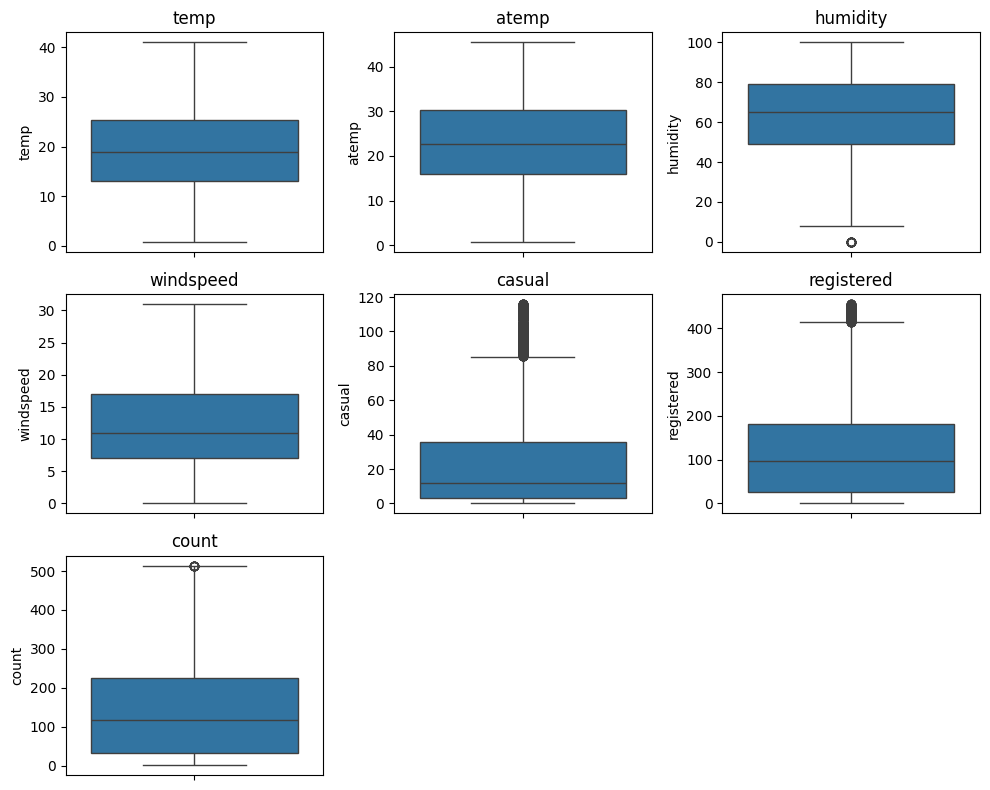

In [ ]:
cols = ["temp","atemp","humidity","windspeed","casual","registered","count"]

plt.figure(figsize=(10,8))
for i,val in enumerate (cols):
  plt.subplot(3,3,i+1)
  sns.boxplot(df1[val])
  plt.title(val)

plt.tight_layout()
plt.show()

## There are still some outliers present in the columns like **casual,registred,count.** Lets perform outlier tratment on these columns again

In [ ]:
# obtain the first quartile
numeric_df = df1.select_dtypes(include = ["number"])
Q1 = numeric_df.quantile(0.25)

# obtain the third quartile
Q3 = numeric_df.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

print()

for column in numeric_df.columns:
    # Define lower and upper bounds for outliers
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]

    # Identify new outliers
    new_outliers = numeric_df[(numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)]

    if not new_outliers.empty:
        print(f'New outliers in column {column}:')
        print(len(new_outliers))

temp           12.3000
atemp          14.3950
humidity       30.0000
windspeed       9.9964
casual         33.0000
registered    155.0000
count         192.0000
dtype: float64

New outliers in column humidity:
21
New outliers in column casual:
393
New outliers in column registered:
126
New outliers in column count:
9


In [ ]:
# Deleting outliers again from newly created DataFrame
df_cleaned=df1[~((numeric_df < (Q1-1.5*IQR))|(numeric_df > (Q3 + 1.5*IQR))).any(axis=1)]

In [ ]:
df_cleaned

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,Clear,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,0,0,Clear,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,0,0,Clear,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,0,0,Clear,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,0,0,Clear,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,0,1,Clear,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,winter,0,1,Clear,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,winter,0,1,Clear,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,winter,0,1,Clear,13.94,17.425,61,6.0032,12,117,129


In [ ]:
df_cleaned.shape

(8842, 12)

In [ ]:
df_cleaned.dtypes

,0
datetime,datetime64[ns]
season,category
holiday,category
workingday,category
weather,category
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


## Now Data is cleaned lets conduct hypothesis testing on various columns.

1. Workingday vs Count

- Working Day has effect on number of electric cycles rented
- Test: **Independent Samples t-test** (since the workingday is categorical and count is numeric )
- Why: Compares means of count based on workingday.
- Null Hypothesis (H0): The mean count of bike rentals is the same for working days and non-working days.
- Alternate Hypothesis (Ha): The mean count of bike rentals is different for working days and non-working days.

In [ ]:
from scipy.stats import ttest_ind

# Separate the counts based on working day status
working_day_counts  = df_cleaned[df_cleaned["workingday"]==1]["count"]

non_working_day_counts = df_cleaned[df_cleaned["workingday"] == 0]["count"]

# Perform the Independent t-test
t_stat, p_value = ttest_ind(working_day_counts, non_working_day_counts)

# Display results
print("Independent t-test results:")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Inference and Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in the mean count of bike rentals between working days and non-working days.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in the mean count of bike rentals between working days and non-working days.")


Independent t-test results:
T-statistic: 15.332
P-value: 0.000
Reject the null hypothesis.
There is a significant difference in the mean count of bike rentals between working days and non-working days.


2. Season vs Count

- Number of Cycles Rented in Different Seasons:
- Test: **ANOVA**.(since the Season is categorical with four categrals and count is numeric )
- Why: Compares means of count across multiple seasons.
- Null Hypothesis (H0): The mean count of bike rentals is the same across all seasons (spring, summer, fall, winter).
- Alternate Hypothesis (Ha): At least one of the season mean count of bike rentals is different.




- Before performing ANOVA analysis,lets check the assumptions of ANOVA.
 - 1. **Normality:**
Perform the Shapiro-Wilk test to check if the residuals in each group follow a normal distribution.
 - 2. **Homogeneity of Variances:**
Perform Levene's test to check if the variances across the groups are equal:

In [ ]:
# Shapiro-Wilk test for normality

from scipy.stats import shapiro

# Separate the counts based on diffrent seasons

spring_count = df_cleaned[df_cleaned["season"] == "spring"]["count"]
summer_count = df_cleaned[df_cleaned["season"] == "summer"]["count"]
fall_count   = df_cleaned[df_cleaned["season"] == "fall"]["count"]
winter_count = df_cleaned[df_cleaned["season"] == "winter"]["count"]



# Perform Shapiro-Wilk test for normality in each group
stat_spring, p_spring = shapiro(spring_count)
stat_summer, p_summer = shapiro(summer_count)
stat_fall, p_fall = shapiro(fall_count)
stat_winter, p_winter = shapiro(winter_count)

print(f"Spring count - Shapiro-Wilk p-value: {p_spring}")
print(f"Summer count - Shapiro-Wilk p-value: {p_summer}")
print(f"Fall count - Shapiro-Wilk p-value: {p_fall}")
print(f"Winter count - Shapiro-Wilk p-value: {p_winter}")

Spring count - Shapiro-Wilk p-value: 2.0803177619034722e-39
Summer count - Shapiro-Wilk p-value: 4.7693648338165856e-32
Fall count - Shapiro-Wilk p-value: 2.9106048202315264e-29
Winter count - Shapiro-Wilk p-value: 2.4209961232404296e-31


- **Inference:**  All p-values from the Shapiro-Wilk test are very small (compare to alpha 0,05), indicating that the data in each season significantly deviates from a normal distribution. This suggests that the normality assumption for ANOVA is not met.

In [ ]:
# Perform Levene's test for Variances
from scipy.stats import levene


# Perform Levene’s test for equality of variances
stat, p_value = levene(spring_count, summer_count, fall_count, winter_count)

print(f"Levene's test - p-value: {p_value}")


Levene's test - p-value: 1.4966924935414005e-71


- **Inference:**The p-value is extremely small, indicating a significant difference in variances across the groups. This means that the assumption of equal variances (homogeneity of variances) is violated.

- Given that both assumptions of ANOVA (normality and equal variances) are violated, we should perform **Kruskal-Wallis H Test:**

In [ ]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis H test
stat_kruskal, p_kruskal = kruskal(spring_count, summer_count, fall_count, winter_count)

print(f"Kruskal-Wallis H test - Statistic: {stat_kruskal}, p-value: {p_kruskal}")
print()
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in the mean count of bike rentals across seasons.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in the mean count of bike rentals across seasons.")

Kruskal-Wallis H test - Statistic: 306.02896755802306, p-value: 4.930461944433665e-66

Reject the null hypothesis.
There is a significant difference in the mean count of bike rentals across seasons.


# 3. Weather vs Count

- Number of Cycles Rented in Different Weather Conditions:
- Test: **ANOVA**.(since the Weather is categorical with four categrals and count is numeric )
- Why:for comparing means across multiple groups (in this case, different weather conditions).
- Null Hypothesis (H0): The mean count of bike rentals is the same across all weather conditions (clear, mist, light_snow, heavy_rain).
- Alternate Hypothesis (Ha): At least one of the weather condition mean for bike rental is different.


- Before performing ANOVA analysis,lets check the assumptions of ANOVA.
 - 1. **Normality:**
Perform the Shapiro-Wilk test to check if the residuals in each group follow a normal distribution.
 - 2. **Homogeneity of Variances:**
Perform Levene's test to check if the variances across the groups are equal:

In [ ]:
# Shapiro-Wilk test for normality

from scipy.stats import shapiro

# Separate the counts based on diffrent weather

Clear_count      = df_cleaned[df_cleaned["weather"] == "Clear"]["count"]
Mist_count       = df_cleaned[df_cleaned["weather"] == "Mist"]["count"]
Light_Snow_count = df_cleaned[df_cleaned["weather"] == "Light_Snow"]["count"]
Heavy_Rain_count = df_cleaned[df_cleaned["weather"] == "Heavy_Rain"]["count"]



# Perform Shapiro-Wilk test for normality in each group
stat_Clear, p_Clear = shapiro(Clear_count)
stat_Mist, p_Mist = shapiro(Mist_count)
stat_Light_Snow, p_Light_Snow = shapiro(Light_Snow_count)
stat_Heavy_Rain, p_Heavy_Rain = shapiro(Heavy_Rain_count)

print(f"Clear count - Shapiro-Wilk p-value: {p_Clear}")
print(f"Mist count - Shapiro-Wilk p-value: {p_Mist}")
print(f"Light_Snow count - Shapiro-Wilk p-value: {p_Light_Snow}")
print(f"Heavy_Rain count - Shapiro-Wilk p-value: {p_Heavy_Rain}")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5667.
  res = hypotest_fun_out(*samples, **kwds)


ValueError: Data must be at least length 3.

- The shapiro wilk test produces an error which states that the data must be at least of legth 3 means some data has less entries.
- The Shapiro-Wilk test requires each group to have at least 3 data points. If any group has fewer than 3 data points or contains zero values, the test cannot be performed.
- Specifically, the Heavy_Rain group contained zero values, which led to occure an error.
- Therefore, we cannot proceed with this test and will need to perform a traditional ANOVA test to obtain the results.



In [ ]:
print(f"Clear_count_length: {len(Clear_count)}")
print(f"Mist_count_length: {len(Mist_count)}")
print(f"Light_Snow_count_length: {len(Light_Snow_count)}")
print(f"Heavy_Rain_count_length: {len(Heavy_Rain_count)}")

Clear_count_length: 5667
Mist_count_length: 2415
Light_Snow_count_length: 759
Heavy_Rain_count_length: 0


In [ ]:
from scipy.stats import f_oneway

# Separate the counts based on diffrent weather

Clear_count      = df_cleaned[df_cleaned["weather"] == "Clear"]["count"]
Mist_count       = df_cleaned[df_cleaned["weather"] == "Mist"]["count"]
Light_Snow_count = df_cleaned[df_cleaned["weather"] == "Light_Snow"]["count"]
Heavy_Rain_count = df_cleaned[df_cleaned["weather"] == "Heavy_Rain"]["count"]

# Perform ANOVA
anova_result = f_oneway(Clear_count,Mist_count,Light_Snow_count,Heavy_Rain_count)

# display result
print(f"ANOVA: F-statistic={anova_result.statistic}, p_value={anova_result.pvalue}")

# Inference and Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in the mean count of bike rentals across weather conditions.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in the mean count of bike rentals across weather conditions.")

ANOVA: F-statistic=nan, p_value=nan
Reject the null hypothesis.
There is a significant difference in the mean count of bike rentals across weather conditions.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [ ]:
print(f"Clear_count_length: {len(Clear_count)}")
print(f"Mist_count_length: {len(Mist_count)}")
print(f"Light_Snow_count_length: {len(Light_Snow_count)}")
print(f"Heavy_Rain_count_length: {len(Heavy_Rain_count)}")


Clear_count_length: 5667
Mist_count_length: 2415
Light_Snow_count_length: 759
Heavy_Rain_count_length: 0


- The one-way ANOVA test using scipy.stats.f_oneway did not produce results because one or more of the groups passed to the function were empty.
- Specifically, the Heavy_Rain group contained zero values, which led to NaN values for the F-statistic and p-value.
- so we will conduct another ANOVA test.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA
model = ols("count ~ C(weather)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display results
print("ANOVA results:")
print(anova_table)

print()
# Inference and Conclusion
alpha = 0.05
p_value = anova_table["PR(>F)"][0]
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in the mean count of bike rentals across weather conditions.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in the mean count of bike rentals across weather conditions.")


ANOVA results:
                  sum_sq      df          F        PR(>F)
C(weather)  1.842842e+06     3.0  41.012255  2.536971e-26
Residual    1.404485e+08  9377.0        NaN           NaN

Reject the null hypothesis.
There is a significant difference in the mean count of bike rentals across weather conditions.


<ipython-input-60-3eb5a6eb2648>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table["PR(>F)"][0]


#4. Weather vs Season

- Weather Dependent on Season:
- Test: Chi-Square Test of Independence.(since both weather and season are categorical)
- Why: Checks if the distribution of weather is independent of season.
- Null Hypothesis (H0): Weather is independent of the season.
- Alternate Hypothesis (Ha):Weather depends on the season.




In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table for weather and workingday
contingency_table = pd.crosstab(df_cleaned["season"], df_cleaned["weather"])


# Perform Chi-Square Test of Independence
chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table)

# Display results
print("Contingency Table:")
print(contingency_table)
print()
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.10f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:")
print(ex)
print()

# Inference and Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("Weather depends on the season.")
else:
    print("Fail to reject the null hypothesis.")
    print("Weather is independent of the season.")


Contingency Table:
weather  Clear  Mist  Light_Snow  Heavy_Rain 
season                                       
spring    1541   678         183            1
summer    1310   578         198            0
fall      1407   447         169            0
winter    1409   712         209            0

Chi-Square Test Results:
Chi-Square Statistic: 52.5261
P-value: 0.0000000359
Degrees of Freedom: 9
Expected Frequencies Table:
[[1.54012678e+03 6.56327188e+02 2.06274259e+02 2.71771093e-01]
 [1.33695567e+03 5.69745533e+02 1.79062882e+02 2.35919475e-01]
 [1.29657781e+03 5.52538453e+02 1.73654942e+02 2.28794390e-01]
 [1.49333974e+03 6.36388826e+02 2.00007917e+02 2.63515042e-01]]

Reject the null hypothesis.
Weather depends on the season.


#5. Holiday vs Count

- Holiday Day has effect on number of electric cycles rented
- Test: **Independent Samples t-test** (since the Holiday is categorical and count is numeric )
- Why: Compares means of count based on Holiday.
- Null Hypothesis (H0): The mean count of bike rentals is the same for holidays and non-holidays.
- Alternate Hypothesis (Ha): The mean count of bike rentals is different for holidays and non-holidays.

In [ ]:
from scipy.stats import ttest_ind

# Separate the counts based on holiday status
holiday_counts = df_cleaned[df_cleaned["holiday"] == 1]["count"]
non_holiday_counts = df_cleaned[df_cleaned["holiday"] == 0]["count"]

# Perform the Independent t-test
t_stat, p_value = ttest_ind(holiday_counts, non_holiday_counts)

# Display results
print("Independent t-test results for holidays:")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Inference and Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in the mean count of bike rentals between holidays and non-holidays.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in the mean count of bike rentals between holidays and non-holidays.")

Independent t-test results for holidays:
T-statistic: -2.699
P-value: 0.007
Reject the null hypothesis.
There is a significant difference in the mean count of bike rentals between holidays and non-holidays.


#6. Temperature vs Count

- Temperature has effect on number of electric cycles rented
- Test: **Pearson Correlation Test** (since the both temp and count  numeric )
- Why: Compares means of count based on Temperature.
- Null Hypothesis (H0): There is no correlation between temperature and bike rentals.
- Alternate Hypothesis (Ha): There is a significant correlation between temperature and bike rentals.

In [ ]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
corr, p_value = pearsonr(df_cleaned["temp"], df_cleaned["count"])

# Display results
print("Pearson correlation results for temperature:")
print(f"Correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

# Inference and Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant correlation between temperature and bike rentals.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant correlation between temperature and bike rentals.")

Pearson correlation results for temperature:
Correlation coefficient: 0.304
P-value: 0.000
Reject the null hypothesis.
There is a significant correlation between temperature and bike rentals.


#7. Windspeed vs Count

- Windspeed has effect on number of electric cycles rented
- Test: **Pearson Correlation Test** (since the both Windspeed and count are numeric )
- Why: Measures the strength and direction of the linear relationship between wind speed and bike rentals..
- Null Hypothesis (H0): There is no linear relationship between wind speed and the number of bike rentals.
- Alternate Hypothesis (Ha): There is a significant linear relationship between wind speed and the number of bike rentals.

In [ ]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
corr, p_value = pearsonr(df_cleaned["windspeed"], df_cleaned["count"])

# Display results
print("Pearson correlation results for wind speed:")
print(f"Correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.10f}")

# Inference and Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant linear relationship between wind speed and bike rentals.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant linear relationship between wind speed and bike rentals.")


Pearson correlation results for wind speed:
Correlation coefficient: 0.107
P-value: 0.0000000000
Reject the null hypothesis.
There is a significant linear relationship between wind speed and bike rentals.


#8. atemp vs Count

- Effect of Feeling Temperature on Bike Rentals.
- Test: **Pearson Correlation Test** (since the both atemp and count are numeric )
- Why: Measures the strength and direction of the linear relationship between feeling temperature and bike rentals.
- Null Hypothesis (H0): There is no significant monotonic relationship between feeling temperature and bike rentals.
- Alternate Hypothesis (Ha): There is a significant monotonic relationship between feeling temperature and bike rentals.

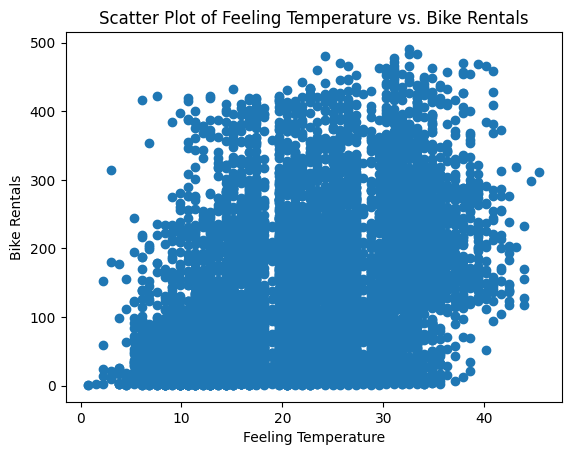

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_cleaned["atemp"], df_cleaned["count"])
plt.xlabel("Feeling Temperature")
plt.ylabel("Bike Rentals")
plt.title("Scatter Plot of Feeling Temperature vs. Bike Rentals")
plt.show()


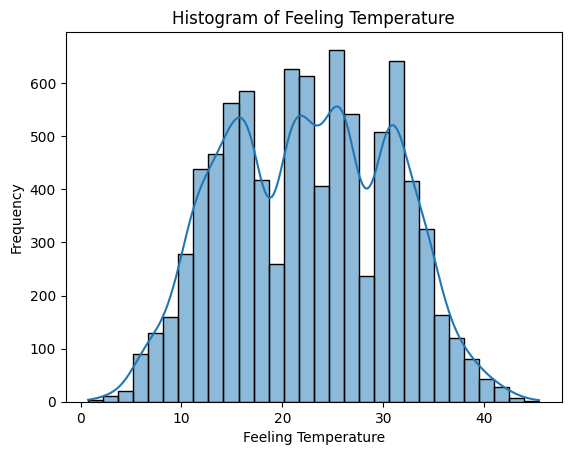

In [ ]:
sns.histplot(df_cleaned["atemp"], bins=30, kde = True)
plt.xlabel("Feeling Temperature")
plt.ylabel("Frequency")
plt.title("Histogram of Feeling Temperature")
plt.show()

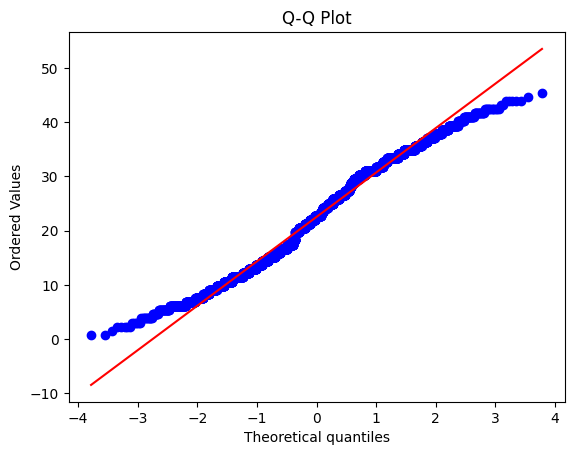

In [ ]:
import scipy.stats as stats

stats.probplot(df_cleaned["atemp"], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


From above graphs lets perform Spearman Rank Correlation:
 - Assumptions: Does not require linearity or normality; suitable for monotonic relationships.
 - Interpretation: Measures the strength and direction of a monotonic relationship.

In [ ]:
from scipy.stats import spearmanr

# Calculate Spearman correlation
corr, p_value = spearmanr(df_cleaned["atemp"], df_cleaned["count"])

# Display results
print("Spearman correlation results for feeling temperature:")
print(f"Correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.2f}")

# Inference and Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant monotonic relationship between feeling temperature and bike rentals.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant monotonic relationship between feeling temperature and bike rentals.")


Spearman correlation results for feeling temperature:
Correlation coefficient: 0.302
P-value: 0.00
Reject the null hypothesis.
There is a significant monotonic relationship between feeling temperature and bike rentals.


#9. Weather vs Workingday

- Weather Dependent on workingday
- Test: Chi-Square Test of Independence.(since both weather and Workingday are categorical)
- Why: Checks if the distribution of weather is independent of Workingday.
- Null Hypothesis (H0): Weather is independent of the Workingday.
- Alternate Hypothesis (Ha):Weather depends on the Workingday.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table for weather and workingday
contingency_table = pd.crosstab(df_cleaned["weather"], df_cleaned["workingday"])

# Perform Chi-Square Test of Independence
chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table)

# Display results
print("Contingency Table:")
print(contingency_table)
print()
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.10f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:")
print(ex)
print()
# Inference and Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("Weather depends on the workingday.")
else:
    print("Fail to reject the null hypothesis.")
    print("Weather is independent of the workingday.")


Contingency Table:
workingday      0     1
weather                
Clear        1608  4059
Mist          699  1716
Light_Snow    189   570
Heavy_Rain      0     1

Chi-Square Test Results:
Chi-Square Statistic: 5.2111
P-value: 0.1569782118
Degrees of Freedom: 3
Expected Frequencies Table:
[[1.59973219e+03 4.06726781e+03]
 [6.81728116e+02 1.73327188e+03]
 [2.14257408e+02 5.44742592e+02]
 [2.82289075e-01 7.17710925e-01]]

Fail to reject the null hypothesis.
Weather is independent of the workingday.


#10. Season vs Workingday

- Season Dependent on workingday
- Test: Chi-Square Test of Independence.(since both Season and Workingday are categorical)
- Why: Checks if the distribution of Season is independent of Workingday.
- Null Hypothesis (H0): Season is independent of the Workingday.
- Alternate Hypothesis (Ha):Season depends on the Workingday.

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table for season and workingday
contingency_table = pd.crosstab(df_cleaned["season"], df_cleaned["workingday"])

# Perform Chi-Square Test of Independence
chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table)

# Display results
print("Contingency Table:")
print(contingency_table)
print()
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.10f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(ex)
print()

# Inference and Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("Season depends on the workingday.")
else:
    print("Fail to reject the null hypothesis.")
    print("Season is independent of the workingday.")


Contingency Table:
workingday    0     1
season               
spring      742  1661
summer      522  1564
fall        525  1498
winter      707  1623

Chi-Square Test Results:
Chi-Square Statistic: 29.2199
P-value: 0.0000020134
Degrees of Freedom: 3
Expected Frequencies Table:
[[ 678.34064691 1724.65935309]
 [ 588.85501018 1497.14498982]
 [ 571.07079846 1451.92920154]
 [ 657.73354445 1672.26645555]]

Reject the null hypothesis.
Season depends on the workingday.


# Question Answered!!

The company wants to know:
- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands


- Based on the hypothesis tests, here's an analysis of the significant factors predicting the demand for shared electric cycles and how well these factors describe the demand:

### <font color = "yellow">**A)  Significant Variables Predicting Demand:**</font>



1.   ### <font color ="blue">**Working Day**</font>
 * **Test:** Independent t-test
 * **Result:** T-statistic: 15.332, P-value: 0.000
 * **Inference:** The significant difference in the mean number of bike rentals between working days and non-working days suggests that working day status is a crucial factor. This indicates that bike rentals are likely higher on working days due to commute needs.


2.   ### <font color ="blue">**Weather Conditions**</font>
 * **Test:** ANOVA
 * **Result:** F-statistic: 41.012, P-value: 2.54e-26
 * **Inference:** Weather conditions significantly impact the number of bike rentals. Different weather conditions (clear, mist, light snow, heavy rain) lead to variations in bike rentals, showing that customers' rental decisions are influenced by weather.

3.   ### <font color ="blue">**Seasons**</font>
 * **Test:** Kruskal-Wallis H test
 * **Result:** H-statistic: 306.03, P-value: 4.93e-66
 * **Inference:** The significant difference in bike rentals across different seasons (spring, summer, fall, winter) implies that seasonality affects demand. Different seasons likely bring varying weather conditions and travel patterns, influencing rental patterns.


 4.   ### <font color ="blue">**Dependency Between Weather and Season**</font>
  * **Test:** Chi-Square Test
  * **Result:** Chi-Square Statistic: 52.526, P-value: 0.0000000359
  * **Inference:** The significant result indicates that weather conditions are dependent on the season. This means that weather patterns vary by season, which indirectly affects the demand for bike rentals.


 5.   ### <font color ="blue">**Holiday vs. Non-Holiday**</font>
  * **Test:** Independent t-test
  * **Result:** T-statistic: -2.699, P-value: 0.007
  * **Inference:** There is a significant difference in the number of bike rentals between holidays and non-holidays. This indicates that demand for bike rentals is different on holidays compared to regular days, possibly due to changes in commuting patterns or leisure activities.


 6.   ### <font color ="blue">**Temperature**</font>
  * **Test:** Pearson Correlation
  * **Result:** Correlation coefficient: 0.304, P-value: 0.000
  * **Inference:** There is a significant positive correlation between temperature and bike rentals. Higher temperatures are associated with an increase in bike rentals, suggesting that people are more likely to rent bikes in warmer weather.


7.   ### <font color ="blue">**Windspeed**</font>
  * **Test:** Pearson Correlation
  * **Result:** Correlation coefficient: 0.107, P-value: 0.0000000000
  * **Inference:** There is a significant but weak positive correlation between windspeed and bike rentals. Although windspeed affects demand, the impact is relatively small compared to other factors.


### <font color = "Yellow">**B)  How Well These Variables Describe Demand:**</font>



1.   ### <font color ="blue">**Working Day**</font>
 - The analysis indicates a clear distinction in demand based on whether it is a working day or not. This variable is strongly significant in predicting demand, showing that more rentals occur on working days.



2.   ### <font color ="blue">**Weather Conditions**</font>
 - Weather significantly impacts bike rental numbers, and the variations in demand across different weather types (e.g., clear vs. heavy rain) are well-captured by your analysis. This suggests that incorporating real-time weather data into the app might help in predicting and managing demand more effectively.

3.   ### <font color ="blue">**Seasons**</font>
 - The seasonality effect is significant, with different seasons showing marked differences in demand. This implies that seasonal patterns should be considered when planning bike availability and promotional strategies.

4.   ### <font color ="blue">**Dependency Between Weather and Season**</font>
 - Since weather depends on the season, understanding seasonal trends in weather conditions will help in better forecasting and resource allocation. For example, if winter has more days with heavy rain or light snow, planning for bike maintenance or adjustments in service levels might be necessary.

5.   ### <font color ="blue">**Holiday vs. Non-Holiday**</font>
 - The significant difference in bike rentals between holidays and non-holidays highlights the need to adjust bike availability and services based on holiday schedules. For instance, during holidays, people may use bikes for leisure or short trips, so increasing availability in popular leisure areas might be beneficial.

6.   ### <font color ="blue">**Temperature**</font>
 - The positive correlation between temperature and bike rentals indicates that warmer weather leads to higher demand. This suggests that temperature should be considered in demand forecasting and that promotions or additional bike availability could be targeted during hotter periods.

7.   ### <font color ="blue">**Windspeed**</font>
 - The weak correlation with windspeed shows that while wind conditions have some effect on rentals, it is not as strong as temperature or other factors. However, it might still be worth considering in more detailed demand models or operational adjustments.





### <font color = "yellow">**Conclusion/Recommendations:**</font>
### To optimize demand for shared electric cycles, Yulu should focus on:


1.   ### <font color ="blue">**Enhancing Services on Working Days:**</font>
 - Increase bike availability or offer promotions on working days to capitalize on higher demand.

2.   ### <font color ="blue">**Weather-Responsive Strategies:**</font>
 - Implement features in the app that provide weather updates and suggest optimal times or alternative travel options based on weather conditions.

3.   ### <font color ="blue">**Seasonal Planning:**</font>
 - Adjust bike availability and maintenance schedules based on seasonal patterns to ensure adequate supply and service quality.

4.   ### <font color ="blue">**Adjust for Holidays:**</font>
 - Implement special strategies for holidays, including higher availability in areas with increased leisure activity.

5.   ### <font color ="blue">**Consider Temperature:**</font>
 - Use temperature forecasts to anticipate demand and adjust bike availability.

6.   ### <font color ="blue">**Monitor Windspeed:**</font>
 - Although its impact is weaker, monitoring wind conditions might help in fine-tuning bike availability and user experience.

7.   ### <font color ="blue">**Uniform Weather Policies:**</font>
 - Apply consistent weather-related policies across all days without differentiating between working and non-working days.